### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [1]:
import pandas as pd

df = pd.read_csv('uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [2]:
# Convert the 'Date/Time' column to datetime format
df['Date/Time']=pd.to_datetime(df['Date/Time'])

# Group by date and count the number of pickups
days={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday',5:'Saturday',6:'Sunday'}
df['BinnedHour']=df['Date/Time'].dt.floor('15min')
df['Day']=df['Date/Time'].dt.weekday.map(days)
df['Date']=df['Date/Time'].dt.date
df['time']=df['Date/Time'].dt.time
df['week']=df['Date/Time'].dt.week
pickups=df.groupby('Date', as_index=False).count()
pickups['Pickups_count']=pickups['Date/Time']
pickups_per_date=pickups[['Date','Pickups_count']]
pickups_per_date
print(pickups_per_date) 

# Find the date with the highest number of pickups
Date_with_highest_pickups=pickups_per_date[pickups_per_date.Pickups_count==pickups_per_date.Pickups_count.max()]['Date']
print(Date_with_highest_pickups)


C:\Users\DELL 5402 231327\AppData\Local\Temp\ipykernel_676\1588654111.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week']=df['Date/Time'].dt.week


          Date  Pickups_count
0   2014-08-01          32353
1   2014-08-02          28678
2   2014-08-03          23146
3   2014-08-04          24952
4   2014-08-05          28094
5   2014-08-06          30495
6   2014-08-07          32759
7   2014-08-08          30411
8   2014-08-09          26286
9   2014-08-10          20584
10  2014-08-11          22632
11  2014-08-12          29646
12  2014-08-13          29788
13  2014-08-14          30457
14  2014-08-15          28974
15  2014-08-16          26234
16  2014-08-17          21209
17  2014-08-18          21956
18  2014-08-19          24834
19  2014-08-20          27955
20  2014-08-21          32304
21  2014-08-22          29512
22  2014-08-23          27097
23  2014-08-24          22036
24  2014-08-25          22093
25  2014-08-26          24550
26  2014-08-27          27018
27  2014-08-28          28597
28  2014-08-29          27424
29  2014-08-30          23930
30  2014-08-31          23271
6    2014-08-07
Name: Date, dtype: objec

#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [3]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
date_highest=''
for i in Date_with_highest_pickups:
    date_highest=i
df[df.Date==date_highest]   
display(df[df.Date==date_highest])

# Get the count of pickups on the highest date
highest_pickups_count=pickups_per_date[pickups_per_date.Pickups_count==pickups_per_date.Pickups_count.max()]
print(highest_pickups_count) 


,Date/Time,Lat,Lon,Base,BinnedHour,Day,Date,time,week
6944,2014-08-07 00:03:00,40.7455,-73.9895,B02512,2014-08-07 00:00:00,Thursday,2014-08-07,00:03:00,32
6945,2014-08-07 00:09:00,40.7499,-74.0025,B02512,2014-08-07 00:00:00,Thursday,2014-08-07,00:09:00,32
6946,2014-08-07 00:10:00,40.7417,-74.0037,B02512,2014-08-07 00:00:00,Thursday,2014-08-07,00:10:00,32
6947,2014-08-07 00:16:00,40.6416,-73.7879,B02512,2014-08-07 00:15:00,Thursday,2014-08-07,00:16:00,32
6948,2014-08-07 00:16:00,40.7008,-73.9405,B02512,2014-08-07 00:15:00,Thursday,2014-08-07,00:16:00,32
...,...,...,...,...,...,...,...,...,...
783791,2014-08-07 23:47:00,40.7337,-73.9925,B02764,2014-08-07 23:45:00,Thursday,2014-08-07,23:47:00,32
783792,2014-08-07 23:47:00,40.7245,-73.9934,B02764,2014-08-07 23:45:00,Thursday,2014-08-07,23:47:00,32
783793,2014-08-07 23:49:00,40.7624,-74.0204,B02764,2014-08-07 23:45:00,Thursday,2014-08-07,23:49:00,32
783794,2014-08-07 23:53:00,40.7801,-73.9589,B02764,2014-08-07 23:45:00,Thursday,2014-08-07,23:53:00,32


         Date  Pickups_count
6  2014-08-07          32759


#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [4]:
# Count the number of unique TLC base companies

print(len(df.Base.unique()))


5


#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [5]:
# Group by TLC base company and count the number of pickups
v=df.groupby('Base').count()
v['pickups']=v['Day']
display(v['pickups'])

# Find the TLC base company with the highest number of pickups
print(df.Base.value_counts().idxmax())


Base
B02512     31472
B02598    220129
B02617    355803
B02682    173280
B02764     48591
Name: pickups, dtype: int64

B02617


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [6]:
# Group by TLC base company and count the number of pickups
base_pickups=df.groupby('Base').count()
base_pickups['pickups']=base_pickups['Day']
display(base_pickups['pickups'])


Base
B02512     31472
B02598    220129
B02617    355803
B02682    173280
B02764     48591
Name: pickups, dtype: int64

#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [30]:
# Extract the hour from the 'Date/Time' column
df['Hour']=df['Date/Time'].dt.hour
df['Hour']
print(df['Hour'])

# Group by hour and count the number of pickups
hour_pickups=df.groupby('Hour').count()
hour_pickups['Pickups']=hour_pickups['Date/Time']
display(hour_pickups['Pickups'])

# Find the hour with the highest number of pickups
print(hour_pickups.idxmax()[0])


0          0
1          0
2          0
3          0
4          0
          ..
829270    23
829271    23
829272    23
829273    23
829274    23
Name: Hour, Length: 829275, dtype: int64


Hour
0     21451
1     14471
2     10105
3     10376
4     11774
5     16525
6     24907
7     34064
8     34566
9     30195
10    30706
11    31778
12    32106
13    35764
14    40644
15    48197
16    53481
17    57122
18    55390
19    53008
20    51674
21    51354
22    46008
23    33609
Name: Pickups, dtype: int64

17


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

Date
2014-08-01    32353
2014-08-02    28678
2014-08-03    23146
2014-08-04    24952
2014-08-05    28094
2014-08-06    30495
2014-08-07    32759
2014-08-08    30411
2014-08-09    26286
2014-08-10    20584
2014-08-11    22632
2014-08-12    29646
2014-08-13    29788
2014-08-14    30457
2014-08-15    28974
2014-08-16    26234
2014-08-17    21209
2014-08-18    21956
2014-08-19    24834
2014-08-20    27955
2014-08-21    32304
2014-08-22    29512
2014-08-23    27097
2014-08-24    22036
2014-08-25    22093
2014-08-26    24550
2014-08-27    27018
2014-08-28    28597
2014-08-29    27424
2014-08-30    23930
2014-08-31    23271
Name: pickups, dtype: int64


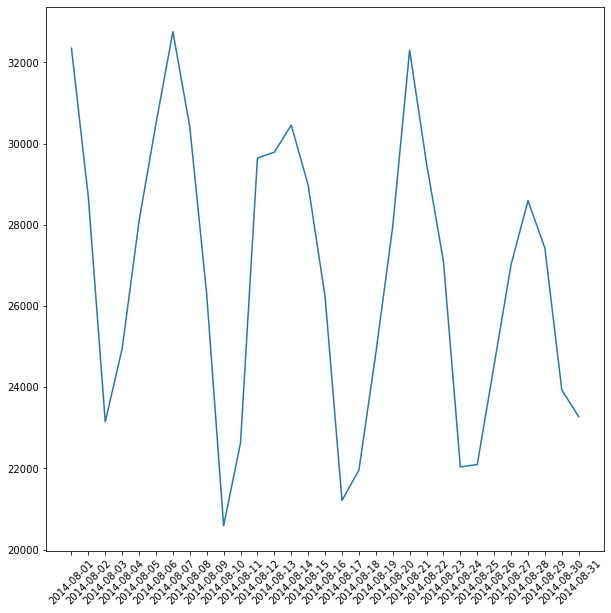

In [8]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups
visualize=df.groupby('Date').count()
visualize['pickups']=visualize['Day']
print(visualize['pickups'])

# Create a line plot to visualize the number of pickups over time
visualize_line=pd.DataFrame(visualize['pickups'].reset_index())
plt.figure(figsize=(10,10))
l=[]
for i in range(len(visualize_line)):
    l.append(str(visualize_line.Date[i]))
plt.plot(l,visualize_line.pickups)
plt.xticks(rotation=45)
plt.show()



#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

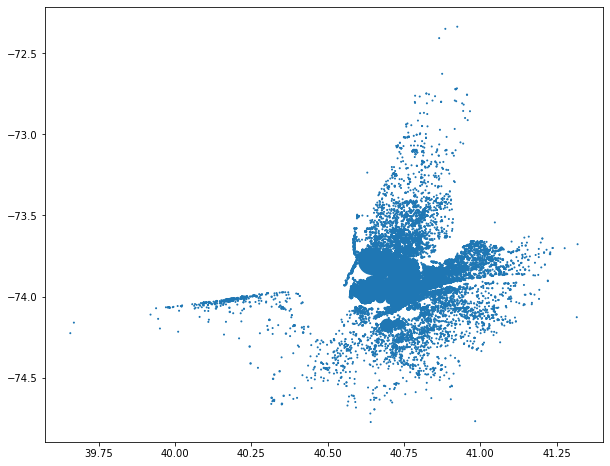

In [9]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
Location_distribute=df.groupby(['Lat','Lon'], as_index=False).count()
Location_distribute['pickups']=Location_distribute['time']
plt.figure(figsize=(10,8))
plt.scatter(Location_distribute['Lat'],Location_distribute['Lon'],Location_distribute['pickups'])
plt.show()

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

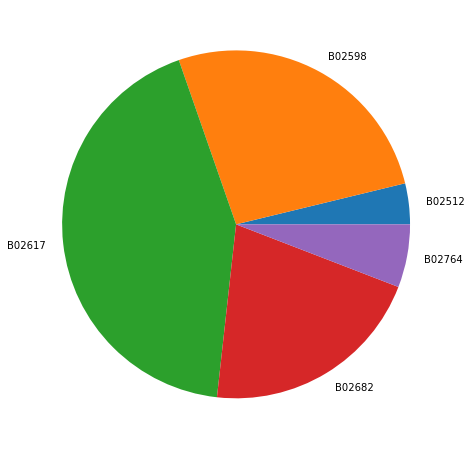

In [10]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
plt.figure(figsize=(10,8))
plt.pie(base_pickups['pickups'], labels=base_pickups.index)
plt.show()

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

Monday        91633
Tuesday      107124
Wednesday    115256
Thursday     124117
Friday       148674
Saturday     132225
Sunday       110246
Name: pickups, dtype: int64


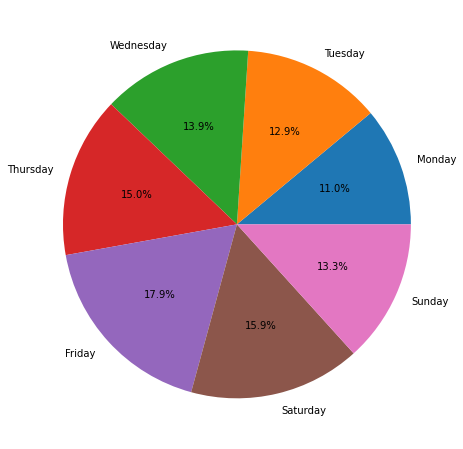

In [27]:
# Group by day of the week and count the number of pickups
Week_Pickup_count=df.groupby('Day').count()
Week_Pickup_count['pickups']=Week_Pickup_count['Date']
cats=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
Week_Pickup_count.index=pd.Categorical(Week_Pickup_count.index, categories=cats, ordered=True)
ordered_Week_Pickup_count=Week_Pickup_count.sort_index()
print(ordered_Week_Pickup_count['pickups'])

# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
plt.figure(figsize=(10,8))
plt.pie(ordered_Week_Pickup_count.pickups, labels=ordered_Week_Pickup_count.index, autopct='%1.1f%%')
plt.show()
